## 1. Import library

In [34]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 2. Prepare data 

* 10 tính năng: age, sex, body mass index, average blood pressure, and six blood serum measurements (tuổi, giới tính, chỉ số khối cơ thể, huyết áp trung bình và sáu phép đo huyết thanh ) đã thu được cho mỗi n = 442 bệnh nhân tiểu đường, cũng như phản ứng quan tâm, một thước đo định lượng về sự tiến triển của bệnh một năm sau khi bắt đầu.

### 2.1 Load data

In [2]:
diabetes = datasets.load_diabetes()

In [5]:
diabetes.data.shape

(442, 10)

In [21]:
diabetes.target.shape

(442,)

In [16]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [17]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## 3. Split train/test

### Linear Regression Model

y = Xβ + c + ϵ

* X: dữ liệu

* β: hệ số 

* c: hệ số chặn

* ϵ: lỗi

* y: biến mục tiêu

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

In [9]:
X_train.shape, X_test.shape

((353, 10), (89, 10))

In [10]:
y_train.shape, y_test.shape

((353,), (89,))

## 3. Build model

In [11]:
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

0.33222203269065154

In [12]:
model.coef_ # beta

array([ -35.55683674, -243.1692265 ,  562.75404632,  305.47203008,
       -662.78772128,  324.27527477,   24.78193291,  170.33056502,
        731.67810787,   43.02846824])

In [13]:
model.intercept_ # c

152.5381335195406

In [19]:
y_pred = model.predict(X_test) 
y_pred

array([238.47145247, 248.93170646, 164.05404165, 120.30794355,
       187.42422054, 259.04865002, 113.55556372, 188.07597044,
       149.49663441, 236.01099949, 172.24629506, 178.88073764,
       109.15751983,  92.13508975, 243.33042043,  87.356971  ,
       155.72606406,  66.99073989, 100.42610442, 218.09422877,
       196.66287912, 161.29832968, 161.70779605, 156.52520454,
       197.88796516, 167.57984206, 120.74478913,  84.83879727,
       192.03728687, 160.60687024, 175.17178362,  84.22833237,
       145.7995542 , 145.97333493, 140.96488953, 197.00421108,
       165.94322494, 190.65906468, 128.22520508, 206.41941223,
        84.35851196, 164.0256504 , 144.1056776 , 184.68355549,
       177.80238966,  74.32855231, 143.3660286 , 138.67726085,
       120.81146113, 234.34252077, 161.94390244,  74.5455476 ,
       154.71905074, 156.78884927, 237.42227096, 174.23053048,
       190.88212635, 118.98373473, 132.20418974, 168.52674824,
       214.74245466, 171.42364091, 157.37409906, 108.86

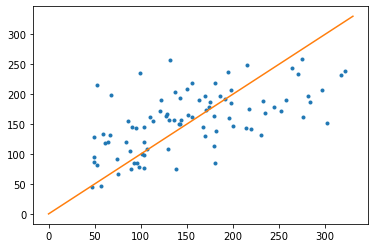

In [15]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [20]:
result = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred})
result

,Actual,Predict
0,321.0,238.471452
1,215.0,248.931706
2,127.0,164.054042
3,64.0,120.307944
4,175.0,187.424221
...,...,...
84,104.0,76.773777
85,49.0,94.940469
86,103.0,145.295505
87,142.0,194.037764


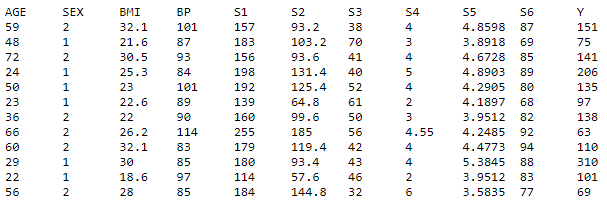

Y: thước đo định lượng về sự tiến triển của bệnh một năm sau so với baseline chắc là S1 or BP